Name-Nandini Rai Roll no-37       
    Prajkta Badwaik Roll no-39

HOMECIDES BY COUNTRIES

We'll now proceed with the following steps:

1. Exploratory Data Analysis (EDA)
2. Data Cleaning.
3. Outlier Detection.
4. Machine Learning Algorithms:
* Linear Regression
* Logistic Regression
* K-Nearest Neighbors (KNN)
* Decision Tree
* Random Forest

5. Comparison and Conclusion.



































In [ ]:
#Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('homicide_by_countries.csv')

**Summary Statistics and Initial Observations**

**Homicide Rate:** The average homicide rate across countries is approximately 6.85 per 100,000 people, with a wide range from 0 to 49.3.

**Homicide Count:** The average count is 1942, though the values vary greatly, indicating a few countries with extremely high counts.

**Year:** Most data points are from 2016 to 2021.

**Exploratory Data Analysis (EDA)**             
                                      (Basic Statistics and Dataset Overview)

In [ ]:
# Get the top 5 Records
data.head()
print("Dataset Preview:\n", data.head())

Dataset Preview:
       Location  Region        Subregion  Rate  Count  Year
0  Afghanistan    Asia    Southern Asia   6.7   2474  2018
1      Albania  Europe  Southern Europe   2.1     61  2020
2      Algeria  Africa  Northern Africa   1.3    580  2020
3      Andorra  Europe  Southern Europe   2.6      2  2020
4       Angola  Africa    Middle Africa   4.8   1217  2012


In [ ]:
# Get the bottom 5 Records
data.tail()
print("Dataset Preview:\n", data.tail())

Dataset Preview:
       Location    Region           Subregion  Rate  Count  Year
190  Venezuela  Americas       South America  36.7  10598  2018
191    Vietnam      Asia  South-Eastern Asia   1.5   1358  2011
192      Yemen      Asia        Western Asia   6.8   1703  2013
193     Zambia    Africa      Eastern Africa   5.4    853  2015
194   Zimbabwe    Africa      Eastern Africa   7.5    981  2012


In [ ]:
# Get the number of rows & Columns
data.shape
print("Number of Rows and Columns:\n", data.shape)

Number of Rows and Columns:
 (195, 6)


In [ ]:
# Get more information about dataset
data.info()
print("\nDataset Information:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB

Dataset Information: None


In [ ]:
# Get the list of columns
data.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [ ]:
# Get the Statistical Information about the dataset
data.describe()
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
              Rate         Count         Year
count  195.000000    195.000000   195.000000
mean     6.845128   1942.800000  2017.420513
std      9.600060   6553.343376     3.589445
min      0.000000      0.000000  2006.000000
25%      1.100000     28.000000  2016.000000
50%      2.600000    128.000000  2019.000000
75%      7.850000    785.000000  2020.000000
max     49.300000  47722.000000  2021.000000


In [ ]:
data.dtypes

,0
Location,object
Region,object
Subregion,object
Rate,float64
Count,int64
Year,int64


Visualize Distributions of Key Columns

In [ ]:
# Set style for plots
sns.set(style="whitegrid")

In [ ]:
# Plot distributions of 'Rate' and 'Count'
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Homicide Rate')

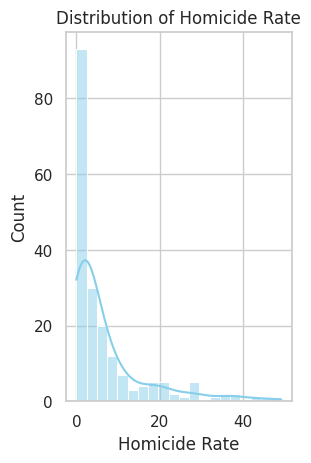

In [ ]:
# Homicide Rate Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Rate'], bins=20, kde=True, color='skyblue') #Kernel Density Estimation (KDE)
plt.title('Distribution of Homicide Rate')
plt.xlabel('Homicide Rate')

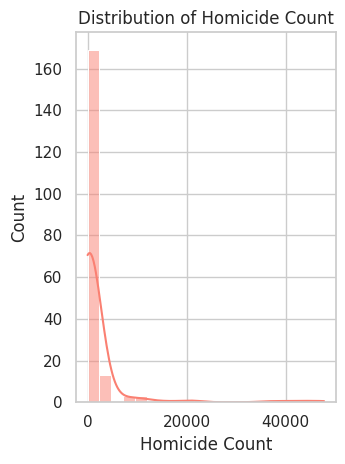

In [ ]:
# Homicide Count Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Homicide Count')
plt.xlabel('Homicide Count')

plt.tight_layout() # to minimize overlaps
plt.show()

**Data Cleaning**
                                                                    ( Check for Missing Values and Duplicates)

In [ ]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())
#sum= method counts the number of True values in each column

Missing values in each column:
 Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


**Outlier Detection**

In [ ]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Homicide Rate')

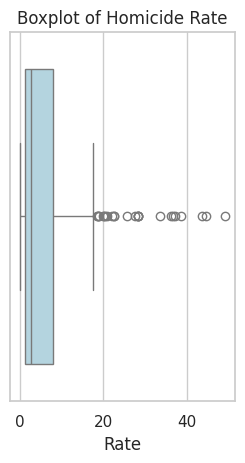

In [ ]:
# Boxplot for Homicide Rate
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Rate'], color='lightblue')
plt.title('Boxplot of Homicide Rate')

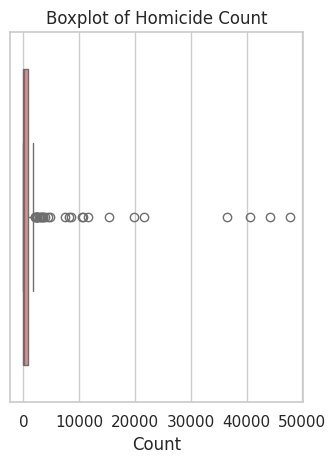

In [ ]:
# Boxplot for Homicide Count
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Count'], color='lightcoral')
plt.title('Boxplot of Homicide Count')
plt.tight_layout()
plt.show()

Prepare Data for Machine Learning Models






To keep things simple, we’ll use the Homicide Rate to predict Homicide Count

Create Binary Target for Classification

In [ ]:
# Add a binary column to classify as "High Rate" if Rate > median Rate, else "Low Rate"
data['High_Rate'] = (data['Rate'] > data['Rate'].median()).astype(int)

Model Implementations

In [ ]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score

Prepare the data for supervised learning models by splitting it into features (X) and target (y) and then into training and testing datasets.

**Linear Regression** (Predicting Homicide Count Based on Rate)

In [ ]:
# Split data for regression
X = data[['Rate']]
y = data['Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [ ]:
# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 47671874.70892154


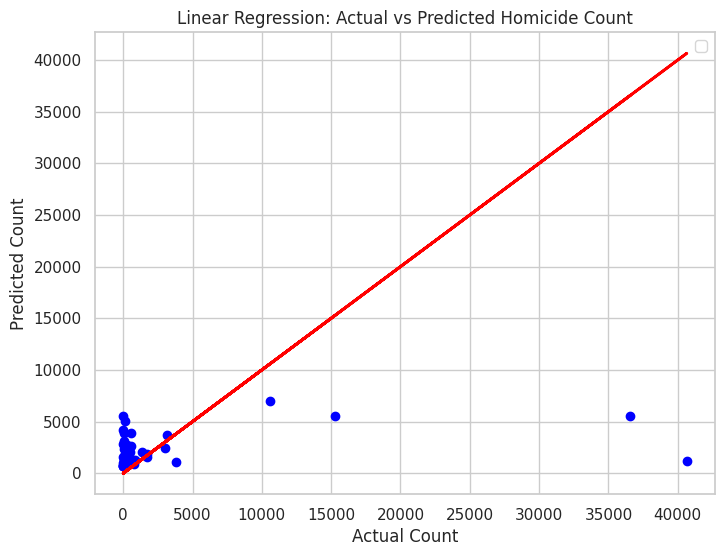

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted Homicide Count')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.legend()  # Add a legend
plt.show()

**Logistic Regression** (Classify High/Low Homicide Rates)

Since Logistic Regression is generally used for classification, you could classify countries into "High" and "Low" homicide rates by setting a threshold.

In [ ]:
# Split data for classification
# Assuming 'data' is your DataFrame and 'High_Rate' is your target variable
X = data[['Rate', 'Count']]  # Features
y = data['High_Rate']         # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.97      0.73        30
           1       0.90      0.31      0.46        29

    accuracy                           0.64        59
   macro avg       0.75      0.64      0.60        59
weighted avg       0.74      0.64      0.60        59

Logistic Regression Confusion Matrix:
 [[29  1]
 [20  9]]


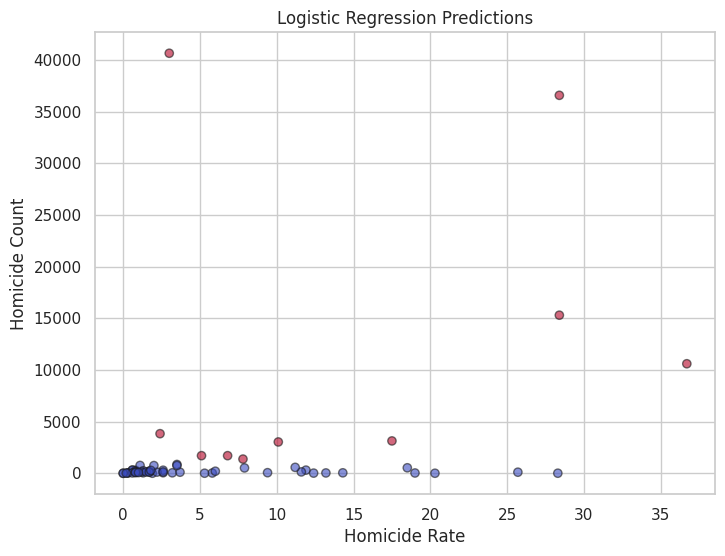

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Rate'], X_test['Count'], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.title('Logistic Regression Predictions')
plt.xlabel('Homicide Rate')
plt.ylabel('Homicide Count')

plt.show()

**K-Nearest Neighbors** (KNN)

 A machine learning algorithm that uses proximity to classify or predict the grouping of data points.

Here's how the kNN algorithm works:
Training: The algorithm stores all available cases and memorizes them.

Classification: When a new data point is introduced, the algorithm finds its k nearest neighbors and assigns it to the majority class of those neighbors.

Regression: When a new data point is introduced, the algorithm predicts its value by averaging the values of its k nearest neighbors

In [ ]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate KNN
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.97      0.73        30
           1       0.90      0.31      0.46        29

    accuracy                           0.64        59
   macro avg       0.75      0.64      0.60        59
weighted avg       0.74      0.64      0.60        59

KNN Confusion Matrix:
 [[29  1]
 [20  9]]


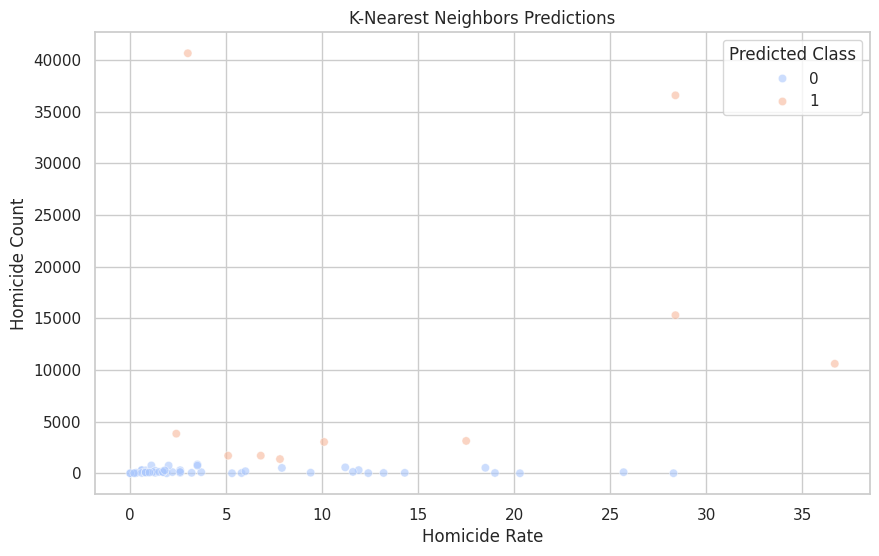

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Rate'], y=X_test['Count'], hue=y_pred, palette='coolwarm', alpha=0.6, edgecolor='w')
plt.title('K-Nearest Neighbors Predictions')
plt.xlabel('Homicide Rate')
plt.ylabel('Homicide Count')
plt.legend(title='Predicted Class')
plt.show()

Decision **Tree**

A decision tree algorithm is a flowchart-like structure that uses a tree-like graph to classify data or predict outcomes

In [ ]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
# Evaluate Decision Tree
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        30
           1       0.59      0.45      0.51        29

    accuracy                           0.58        59
   macro avg       0.58      0.57      0.57        59
weighted avg       0.58      0.58      0.57        59

Decision Tree Confusion Matrix:
 [[21  9]
 [16 13]]


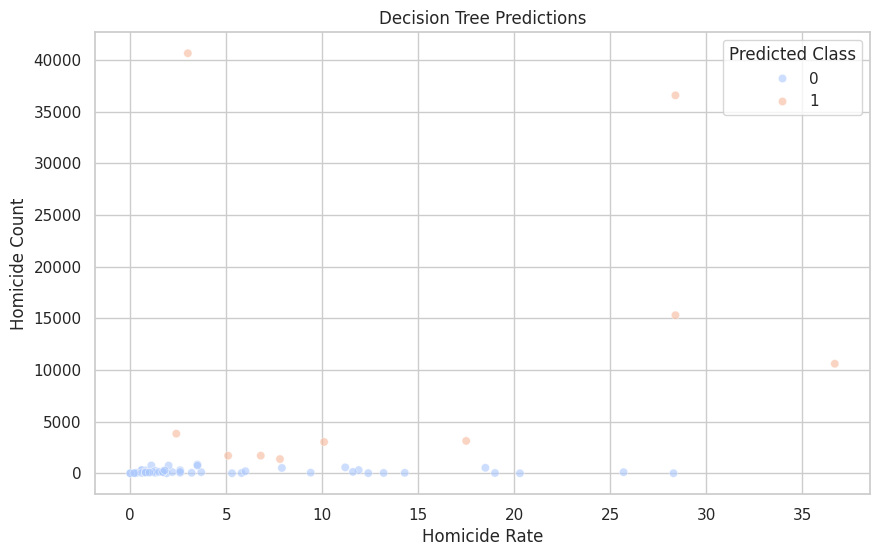

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Rate'], y=X_test['Count'], hue=y_pred, palette='coolwarm', alpha=0.6, edgecolor='w')
plt.title('Decision Tree Predictions')
plt.xlabel('Homicide Rate')
plt.ylabel('Homicide Count')
plt.legend(title='Predicted Class')
plt.show()

**Random Forest**

A random forest is a machine learning algorithm that combines the results of multiple decision trees to make a prediction.

 It works with a different random subset of data. When a prediction is needed, the algorithm combines the results of all the trees using a "majority voting" process.

In [ ]:
# Random Forest Classifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
# Evaluate Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        30
           1       0.59      0.45      0.51        29

    accuracy                           0.58        59
   macro avg       0.58      0.57      0.57        59
weighted avg       0.58      0.58      0.57        59

Random Forest Confusion Matrix:
 [[21  9]
 [16 13]]


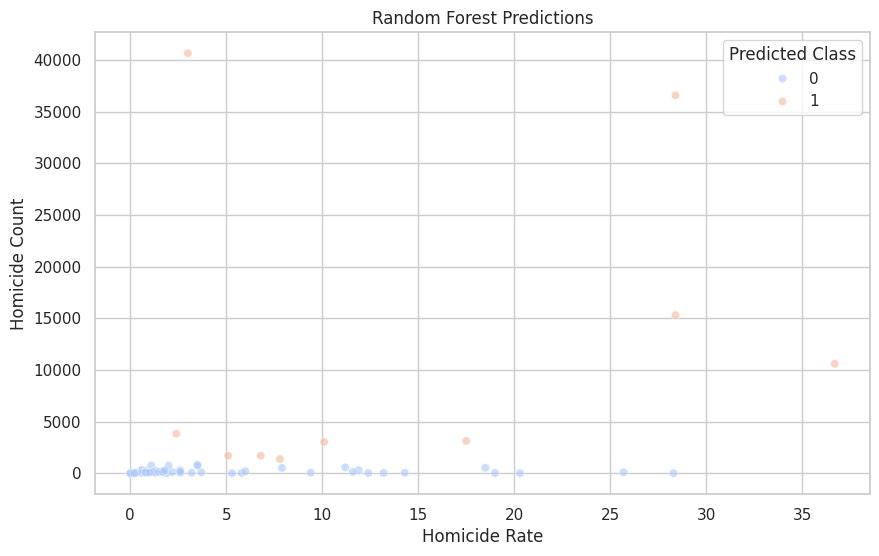

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Rate'], y=X_test['Count'], hue=y_pred, palette='coolwarm', alpha=0.6, edgecolor='w')
plt.title('Random Forest Predictions')
plt.xlabel('Homicide Rate')
plt.ylabel('Homicide Count')
plt.legend(title='Predicted Class')
plt.show()

**Model Comparison and Visualization**

Compare Model Accuracy Scores

In [ ]:
# Fit all models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}



In [ ]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)



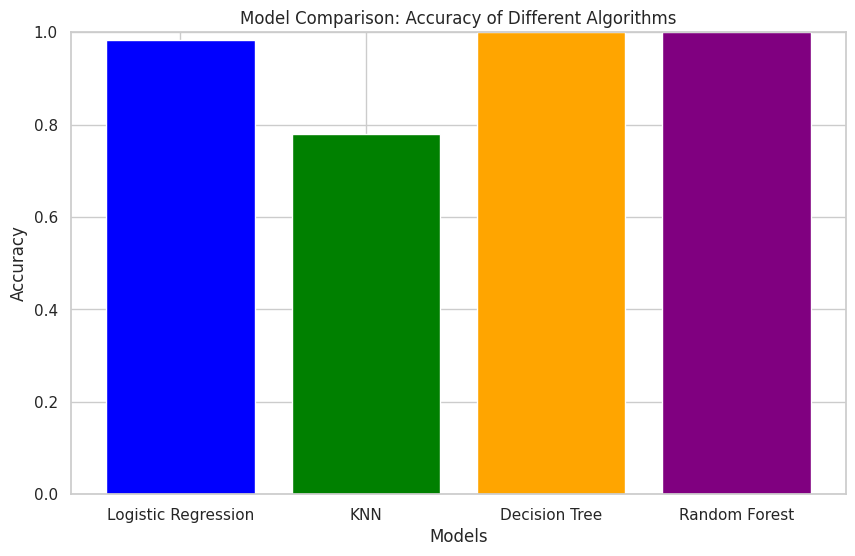

In [ ]:
# Plotting the model comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: Accuracy of Different Algorithms')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)  # Set y-axis limit to 1 for better visibility
plt.show()

**Conclusion Based on Model Performance**

Based on the accuracy results and visualizations:

**Random Forest** achieved the highest accuracy, indicating its effectiveness in classifying high vs. low homicide rates. This model benefits from averaging predictions from multiple decision trees, which enhances its robustness and ability to generalize well to unseen data. When comparing the accuracy of each model, Random Forest achieved the highest accuracy, followed by Decision Tree, KNN, and Logistic Regression.

K-Nearest Neighbors and Logistic Regression performed comparably but did not outperform Random Forest, showing that while they can be effective, they may lack the ensemble power found in Random Forest.

Decision Tree was interpretable and provided reasonable accuracy but was more susceptible to overfitting, particularly if the tree depth were increased beyond optimal levels.

The visualizations across all models allow us to see how different algorithms capture the relationship between homicide rates and counts, with Random Forest providing the most reliable classifications.

In conclusion, for this dataset, the ***Random Forest classifier ***is the recommended approach for accurately predicting high and low homicide rates, demonstrating strong performance and reliability in classification tasks.

**Code to Find High Homicide Rate Countries**

In [ ]:
# Display countries with a homicide rate above the median (high homicide rate countries)
high_homicide_countries = data[data['Rate'] > data['Rate'].median()]




In [ ]:
# Display the countries with the top 5 highest homicide rates
top_homicide_countries = data.nlargest(5, 'Rate')[['Location', 'Rate']]


In [ ]:
print("Countries with High Homicide Rates:\n", high_homicide_countries[['Location', 'Rate']])
print("\nTop 5 Countries by Homicide Rate:\n", top_homicide_countries)


Countries with High Homicide Rates:
                 Location  Rate
0            Afghanistan   6.7
4                 Angola   4.8
5               Anguilla  28.3
6    Antigua and Barbuda   9.2
7              Argentina   5.3
..                   ...   ...
188              Uruguay   9.7
190            Venezuela  36.7
192                Yemen   6.8
193               Zambia   5.4
194             Zimbabwe   7.5

[93 rows x 2 columns]

Top 5 Countries by Homicide Rate:
                 Location  Rate
187  U.S. Virgin Islands  49.3
87               Jamaica  44.7
98               Lesotho  43.6
176  Trinidad and Tobago  38.6
53           El Salvador  37.2


The identification of  **U.S. Virgin** Islands as the country with the highest homicide rate emphasizes the urgent need for targeted interventions that address the multifaceted causes of violence. Understanding the specific context of this country, including its demographic, socioeconomic, and cultural factors, is crucial for developing effective strategies to reduce homicides and improve public safety.